In [121]:
import pandas as pd
from pandas import *
import numpy as np
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [122]:
# turn off a warning that makes processing quicker
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [123]:
data =pd.read_csv('DMV10042.csv')
data

,Ozone_ Contn,NO2_Contn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
0,0.014,34.0,36,17.0,25.0,39.0
1,0.025,41.0,80,14.0,13.0,26.0
2,0.049,14.0,64,19.0,24.0,35.0
3,0.042,14.0,80,18.0,21.0,26.0
4,0.027,23.0,76,34.0,37.0,31.0
...,...,...,...,...,...,...
382,0.023,31.2,41,31.2,14.6,24.0
383,0.019,34.4,48,34.4,14.5,24.0
384,0.037,54.0,76,54.0,47.0,62.0
385,0.015,23.0,37,23.0,16.9,29.0


In [124]:
data.columns

Index([' Ozone_ Contn', ' NO2_Contn', 'Temp_ Avg ', 'SO2 _Contn',
       ' PM2.5_Contn', 'deathIncrease'],
      dtype='object')

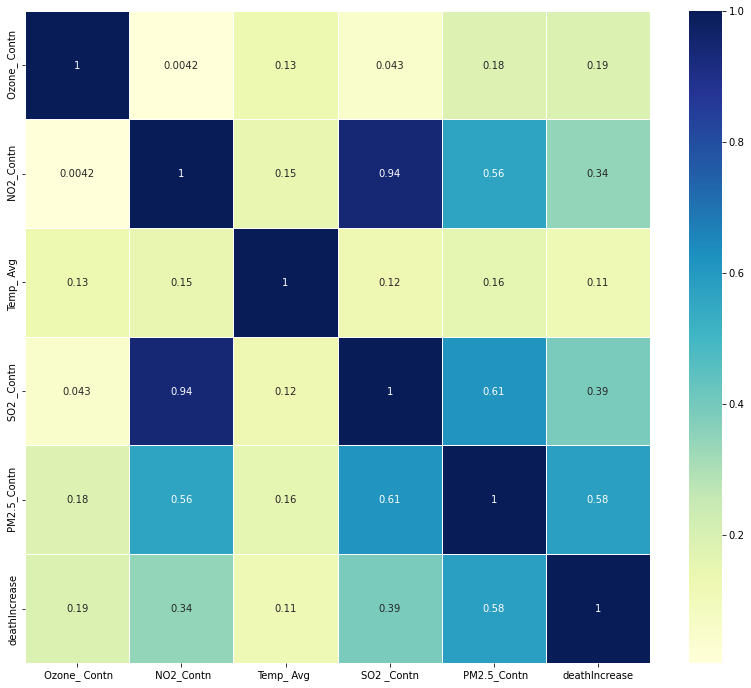

In [125]:
corrMatrix=data[[' Ozone_ Contn', ' NO2_Contn', 'Temp_ Avg ', 'SO2 _Contn',' PM2.5_Contn', 'deathIncrease']].corr()
plt.rcParams["figure.figsize"] = (14,12)
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", linewidths=.5)
plt.show()

array([[<AxesSubplot:title={'center':' Ozone_ Contn'}>,
        <AxesSubplot:title={'center':' NO2_Contn'}>],
       [<AxesSubplot:title={'center':'Temp_ Avg '}>,
        <AxesSubplot:title={'center':'SO2 _Contn'}>],
       [<AxesSubplot:title={'center':' PM2.5_Contn'}>,
        <AxesSubplot:title={'center':'deathIncrease'}>]], dtype=object)

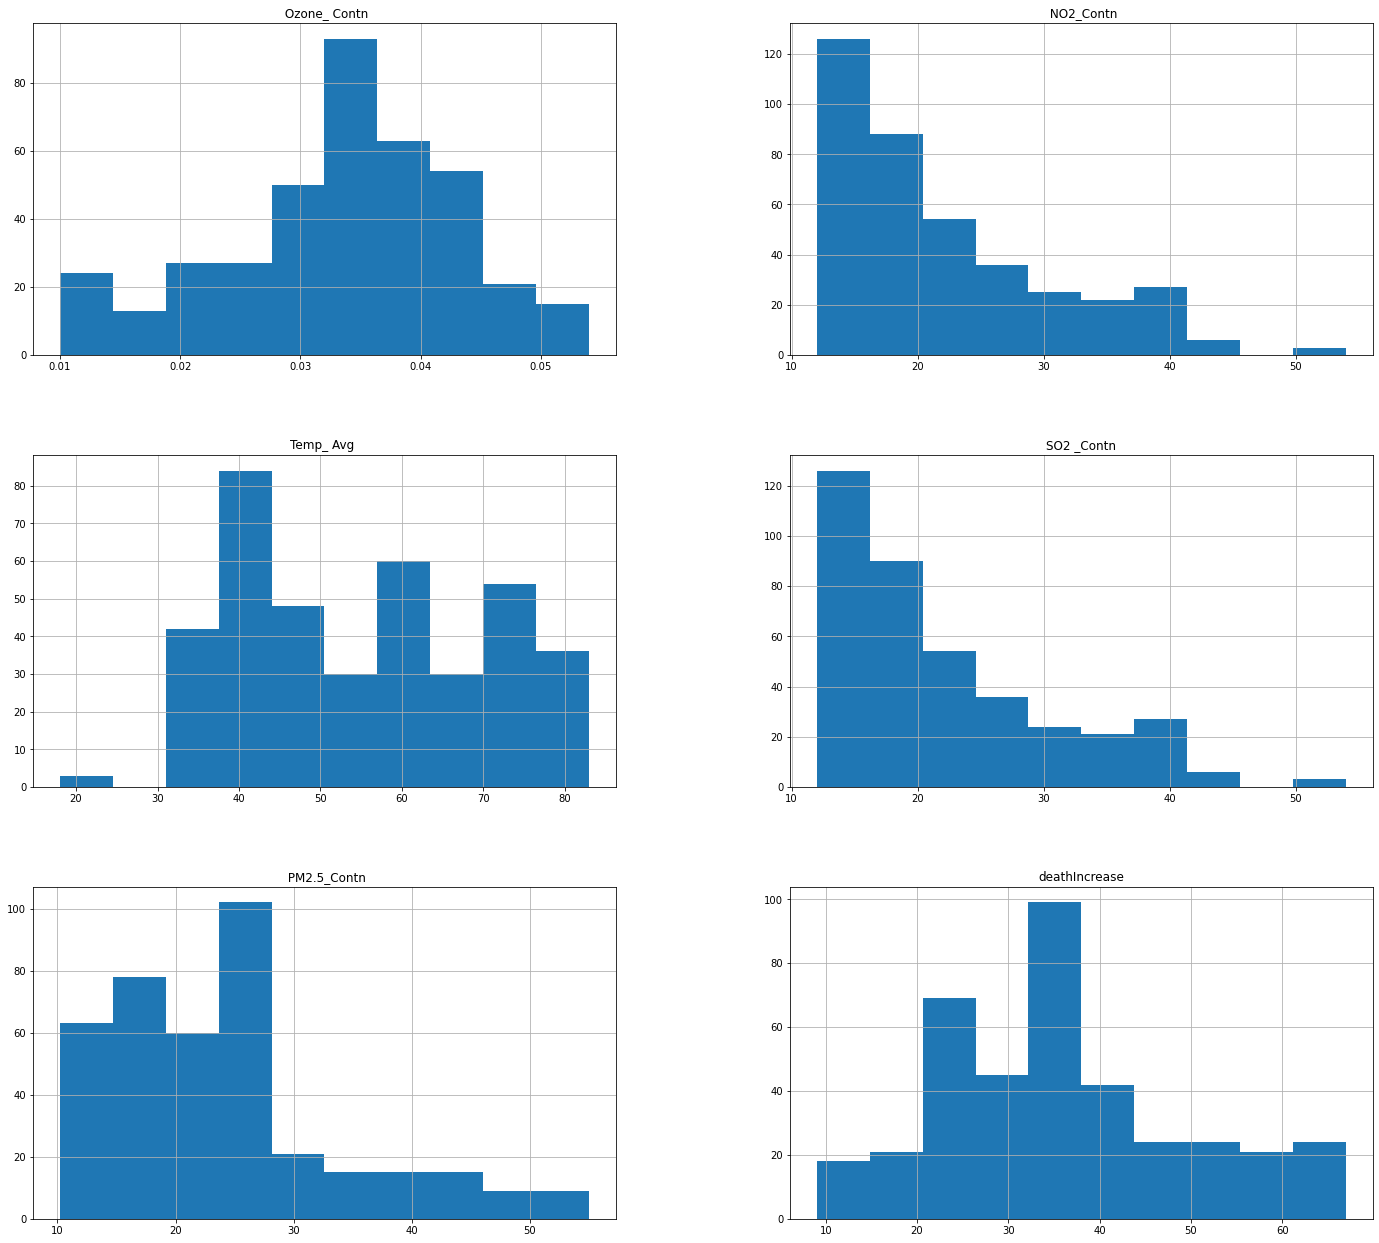

In [126]:
# view distributions of variables
plt.rcParams["figure.figsize"] = (24,22)
data.hist()

In [127]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'deathIncrease']
y = data.loc[:, data.columns == 'deathIncrease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=20)

In [128]:
import statsmodels.api as sm

X_train['intercept'] =1
lm = sm.OLS(y_train,X_train)
lr_results = lm.fit()
lr_results.summary() 

C:\Users\Tamrat\AppData\Local\Temp/ipykernel_30916/2741738047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['intercept'] =1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          deathIncrease   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     34.66
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.28e-27
Time:                        14:16:25   Log-Likelihood:                -1101.3
No. Observations:                 290   AIC:                             2215.
Df Residuals:                     284   BIC:                             2237.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
 Ozone_ Contn    81.1060     70.544      1.150      0.251     -57.749     219.961
 NO2_Contn       -0.1346      0.210     -0.641      0.522      -0.548       0.279
Temp_ Avg         0.0525      0.042      1.259      0.209      -0.030       0.135
SO2 _Contn        0.2089      0.220      0.952      0.342      -0.223       0.641
 PM2.5_Contn      0.7481      0.083      9.053      0.000       0.585       0.911
intercept        10.1925      3.284      3.104      0.002       3.729      16.656
==============================================================================
Omnibus:                       57.870   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.271
Skew:                          -0.925   Prob(JB):                     6.36e-33
Kurtosis:                       5.975   Cond. No.                     7.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
X_train.drop(columns='intercept',inplace=True)

C:\Users\Tamrat\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [130]:
from sklearn.linear_model import LinearRegression

Reg = LinearRegression(fit_intercept=True)

In [131]:
Reg.fit(X_train,y_train)

LinearRegression()

In [132]:
pred = Reg.predict(X_test)

In [133]:
# calculate an accuracy metric and an error metric
from sklearn.metrics import mean_squared_error

test_set_rsq = Reg.score(X_test,y_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))

In [134]:
print('Test Set RSQ value with Linear Regression:',test_set_rsq)
print('Test Set RMSE with Linear Regression:',test_set_rmse)
print('Actual Dep Var Standard Dev:',y_test['deathIncrease'].std())

Test Set RSQ value with Linear Regression: 0.21282554299283052
Test Set RMSE with Linear Regression: 11.622792698177859
Actual Dep Var Standard Dev: 13.168164580504147


<AxesSubplot:xlabel='deathIncrease'>

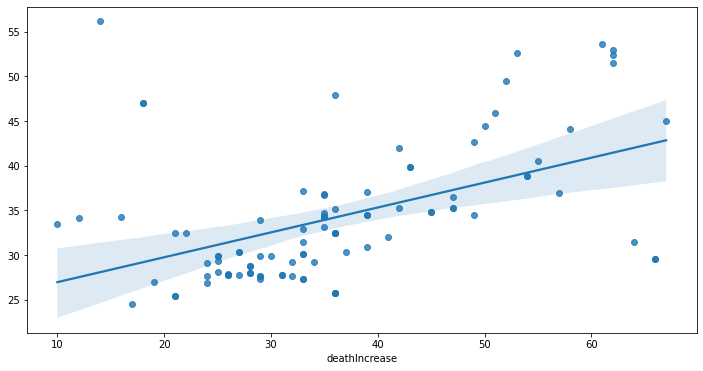

In [135]:
# how well do our predictions look against the actual values?
plt.rcParams["figure.figsize"] = (12,6)
sns.regplot(x=y_test['deathIncrease'],y=pred)

In [136]:
# residual plot - how randomly dispersed are our errors?
# xmin = 250; xmax = 550
# x_plot = plt.scatter(pred, (pred - y_test['deathIncrease']), c='b')
# plt.hlines(y=0, xmin=xmin, xmax=xmax)
# plt.title('Residual plot')

In [137]:
# coefficient plot
# predictors = X.columns
# coef = pd.Series(Reg.coef_[0],predictors).sort_values()
# coef.plot(kind='bar', title='Modal Coefficients')

#### Ridge

Section Goals
Find optimal alpha value using 5-fold cross-validation



In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import tqdm

# loop through 100 alpha values
metrics = {}
for i in tqdm.tqdm(range(1,101)):
    RidgeReg = Ridge(alpha=10/i)
    rsq = cross_val_score(RidgeReg,X_train,y_train,cv=5)
    metrics[10/i] = rsq.mean()

100%|██████████| 100/100 [00:01<00:00, 64.99it/s]


In [139]:
optimal_alpha = max(metrics, key=metrics.get)
print(optimal_alpha)

0.1


In [140]:
RidgeReg = Ridge(alpha=optimal_alpha)

In [141]:
# train model
RidgeReg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [142]:
# make predictions
pred = RidgeReg.predict(X_test)


In [143]:
# calculate an accuracy metric and an error metric
test_set_rsq = RidgeReg.score(X_test,y_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))

print('Test Set RSQ value with Ridge:',test_set_rsq)
print('Test Set RMSE with Ridge:',test_set_rmse)
print('Actual Dep Var Standard Dev:',y_test['deathIncrease'].std())

Test Set RSQ value with Ridge: 0.1995627432617363
Test Set RMSE with Ridge: 11.720297690092828
Actual Dep Var Standard Dev: 13.168164580504147


<AxesSubplot:xlabel='deathIncrease'>

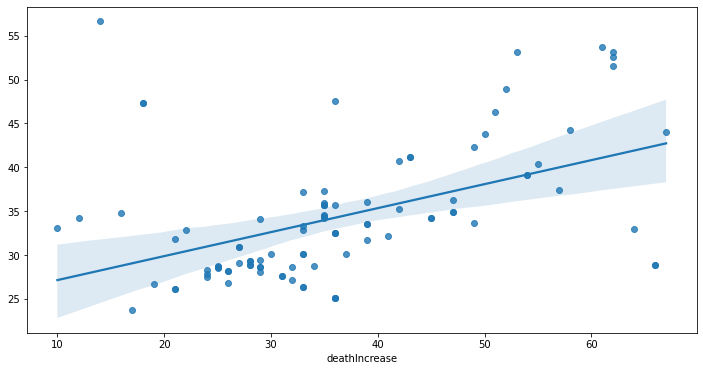

In [144]:
sns.regplot(x=y_test['deathIncrease'],y=pred)

In [145]:
# grid search with 5-fold cross validation

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor()
parameters = {'max_depth':[3,5,10],'n_estimators':[100,500,1000],}
rf = GridSearchCV(reg, parameters, cv=5)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [100, 500, 1000]})

In [146]:
print(rf.best_estimator_)
print(rf.best_score_)
print(rf.best_params_)

RandomForestRegressor(max_depth=10, n_estimators=500)
0.770673313842305
{'max_depth': 10, 'n_estimators': 500}


In [147]:
# make predictions on our test dataset
pred = rf.predict(X_test)

In [148]:
# calculate an accuracy metric and an error metric
test_set_rsq = rf.score(X_test,y_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))

print('Test Set RSQ value with Random Forest:',test_set_rsq)
print('Test Set RMSE with Random Forest:',test_set_rmse)
print('Actual Dep Var Standard Dev:',y_test['deathIncrease'].std())

Test Set RSQ value with Random Forest: 0.8312263655637544
Test Set RMSE with Random Forest: 5.381796806396822
Actual Dep Var Standard Dev: 13.168164580504147


<AxesSubplot:xlabel='deathIncrease'>

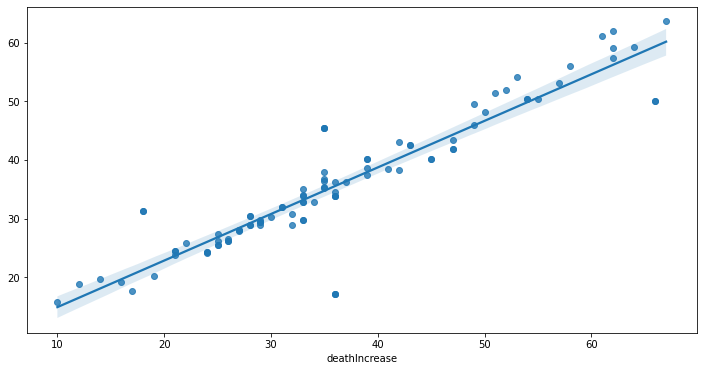

In [149]:
# how well do our predictions look against the actual values?
sns.regplot(x=y_test['deathIncrease'],y=pred)

In [150]:
# store results to view later
add_new_model_metrics('Random Forest',test_set_rsq,test_set_rmse)

NameError: name 'add_new_model_metrics' is not defined

In [ ]:
# big tree visualizations
import pydot 
from sklearn.tree import export_graphviz

tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'rf_tree.dot', feature_names = X.columns.to_list(), rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('rf_tree.dot')
graph.write_png('rf_tree.png')

In [ ]:
from sklearn.neural_network import MLPRegressor

# specify model without any tuning, just best guess on how to specify it
# given more time, resources, and data, we might want to spend more time optimizing this model
nn = MLPRegressor(
    activation = 'relu', # linear functional form since we already accounted for non-linearities
    hidden_layer_sizes = (10,100,),
    solver = 'lbfgs', # this solver works well on small datasets (a big dataset means 10s or 100s of thousands of observations)
    alpha = .001,
    random_state = 20,
    early_stopping = False
)

In [ ]:
# train model
nn.fit(X_train, y_train)

In [ ]:
# calculate an accuracy metric and an error metric
test_set_rsq = nn.score(X_test,y_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))

print('Test Set RSQ value with Neural Network:',test_set_rsq)
print('Test Set RMSE with Neural Network:',test_set_rmse)
print('Actual Dep Var Standard Dev:',y_test['deathIncrease'].std())

#### Lasso

Section Goals

Find optimal alpha value using 5-fold cross-validation
Train a lasso regression using optimal alpha value
Make predctions on test dataset
Calculate root mean square error and R-squared
Create visualizations of predictions and residuals
Create coefficient plot

In [ ]:
from sklearn.linear_model import Lasso

# loop through 100 alpha values
metrics = {}
for i in tqdm.tqdm(range(1,101)):
    LassoReg = Lasso(alpha=10/i)
    rsq = cross_val_score(LassoReg,X_train,y_train,cv=5)
    metrics[10/i] = rsq.mean()

In [118]:
# access the best-performing alpha value
optimal_alpha = max(metrics, key=metrics.get)
print(optimal_alpha)

0.1


In [ ]:
# specify model with optimal alpha value
LassoReg = Lasso(alpha=optimal_alpha)

In [120]:
# train model
LassoReg.fit(X_train,y_train)

NameError: name 'LassoReg' is not defined

In [ ]:
# make predictions
pred = LassoReg.predict(X_test)

In [ ]:
# calculate an accuracy metric and an error metric
test_set_rsq = LassoReg.score(X_test,y_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))

print('Test Set RSQ value with Lasso:',test_set_rsq)
print('Test Set RMSE with Lasso:',test_set_rmse)
print('Actual Dep Var Standard Dev:',y_test['deathIncrease'].std())

In [ ]:
# store results to view later
add_new_model_metrics('Lasso',test_set_rsq,test_set_rmse)

In [ ]:
# how well do our predictions look against the actual values?
sns.regplot(x=y_test['deathIncrease'],y=pred)